# Life Expectancy Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import copy
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly

In [2]:
os.getcwd()

'C:\\Users\\nitish\\Desktop\\MSc_Komal\\R\\Project\\Life Expectancy'

In [3]:
os.chdir('C:\\Users\\nitish\\Desktop\\MSc_Komal\\R\\Project\\Life Expectancy')

In [4]:
os.getcwd()

'C:\\Users\\nitish\\Desktop\\MSc_Komal\\R\\Project\\Life Expectancy'

### Store the dataset into the Dataframe


In [5]:
Life_Exp = pd.read_csv('Life_Prediction.csv')
Life_Exp.head()

Country    Year Country_Code  GDP per capita  Population  \
0  Afghanistan  1990.0          AFG        963.0000  12412311.0   
1  Afghanistan  1991.0          AFG        881.1704  13299016.0   
2  Afghanistan  1992.0          AFG        843.8753  14485543.0   
3  Afghanistan  1993.0          AFG        578.4027  15816601.0   
4  Afghanistan  1994.0          AFG        428.4246  17075728.0   

   World Happiness Index  $3.20_PER_DAY_BPL  $1.90_PER_DAY_BPL  \
0                  3.983                0.0                0.0   
1                  3.983                0.0                0.0   
2                  3.983                0.0                0.0   
3                  3.983                0.0                0.0   
4                  3.983                0.0                0.0   

   Health expenditure per capita  infant_death  ... Death_by_Parkinson's  \
0                            0.0       71955.0  ...                371.0   
1                            0.0       75883.0  ...                374.0   
2                            0.0       85444.0  ...                378.0   
3                            0.0       97256.0  ...                384.0   
4                            0.0      104630.0  ...                391.0   

   Daily Calorie Intake  Death_by_pollution  Death_by_malnutrition  \
0                2314.0             78474.0                59699.0   
1                2044.0             81238.0                62535.0   
2                1891.0             87988.0                67541.0   
3                1910.0             96417.0                72461.0   
4                1820.0            100767.0                75317.0   

   Death_by_Alcohol_Abuse  Death_by_Other_RF  Death_by_other_disease  \
0                 37556.0            33607.0                 72573.0   
1                 38752.0            34614.0                 77836.0   
2                 42481.0            36618.0                 86051.0   
3                 48522.0            39755.0                 95637.0   
4                 52374.0            40907.0                100081.0   

   Life expectancy  continent  code  
0           50.331       Asia    AF  
1           50.999       Asia    AF  
2           51.641       Asia    AF  
3           52.256       Asia    AF  
4           52.842       Asia    AF  

[5 rows x 35 columns]

In [6]:
Life_Exp.continent.unique()

array(['Asia', 'Unknown', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America', 'Antarctica'], dtype=object)

### Check the shape of the dataframe


In [7]:
np.shape(Life_Exp)

(67814, 35)

### Check the Detail information of the dataframe

In [8]:
Life_Exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67814 entries, 0 to 67813
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          67814 non-null  object 
 1   Year                             67814 non-null  float64
 2   Country_Code                     67814 non-null  object 
 3   GDP per capita                   67814 non-null  float64
 4   Population                       67814 non-null  float64
 5   World Happiness Index            67814 non-null  float64
 6   $3.20_PER_DAY_BPL                67814 non-null  float64
 7   $1.90_PER_DAY_BPL                67814 non-null  float64
 8   Health expenditure per capita    67814 non-null  float64
 9   infant_death                     67814 non-null  float64
 10  Death_by_executions              67814 non-null  object 
 11  Death_by_Meningitis              67814 non-null  float64
 12  Death_by_Malaria  

### Display All the column names

In [9]:
Life_Exp.columns

Index(['Country', 'Year', 'Country_Code', 'GDP per capita', 'Population',
       'World Happiness Index', '$3.20_PER_DAY_BPL', '$1.90_PER_DAY_BPL',
       'Health expenditure per capita', 'infant_death', 'Death_by_executions',
       'Death_by_Meningitis', 'Death_by_Malaria', 'Death_by_Drowning',
       'Death_by_violence', 'Death by HIV/AIDS', 'Death_by_Alcohol_&_Drugs',
       'Death by Tuberculosis', 'Death_by_Suicide', 'Terrorism (deaths)',
       'Death by Cardiovascular disease', 'Death by Kidney disease',
       'Death by Respiratory disease', 'Death by Cirrhosis',
       'Death_by_Alzheimer's', 'Death_by_Parkinson's', 'Daily Calorie Intake',
       'Death_by_pollution', 'Death_by_malnutrition', 'Death_by_Alcohol_Abuse',
       'Death_by_Other_RF', 'Death_by_other_disease', 'Life expectancy',
       'continent', 'code'],
      dtype='object')

### Renaming the columns

In [10]:
Life_Exp.rename(columns = {'code':'Country_2_Code'}, inplace = True)
Life_Exp.columns

Index(['Country', 'Year', 'Country_Code', 'GDP per capita', 'Population',
       'World Happiness Index', '$3.20_PER_DAY_BPL', '$1.90_PER_DAY_BPL',
       'Health expenditure per capita', 'infant_death', 'Death_by_executions',
       'Death_by_Meningitis', 'Death_by_Malaria', 'Death_by_Drowning',
       'Death_by_violence', 'Death by HIV/AIDS', 'Death_by_Alcohol_&_Drugs',
       'Death by Tuberculosis', 'Death_by_Suicide', 'Terrorism (deaths)',
       'Death by Cardiovascular disease', 'Death by Kidney disease',
       'Death by Respiratory disease', 'Death by Cirrhosis',
       'Death_by_Alzheimer's', 'Death_by_Parkinson's', 'Daily Calorie Intake',
       'Death_by_pollution', 'Death_by_malnutrition', 'Death_by_Alcohol_Abuse',
       'Death_by_Other_RF', 'Death_by_other_disease', 'Life expectancy',
       'continent', 'Country_2_Code'],
      dtype='object')

### Describe the entire dataset

In [11]:
Life_Exp.describe()

Year  GDP per capita    Population  World Happiness Index  \
count  67814.000000    67814.000000  6.781400e+04           67814.000000   
mean    1650.362374     1965.992812  2.664332e+07               0.849773   
std     1290.461579     6272.200251  2.270990e+08               2.005307   
min   -10000.000000        0.000000  0.000000e+00               0.000000   
25%     1829.000000        0.000000  1.547150e+04               0.000000   
50%     1910.000000        0.000000  5.148005e+05               0.000000   
75%     1977.000000     1225.060800  3.910587e+06               0.000000   
max     2021.000000   156299.000000  7.874966e+09               7.603000   

       $3.20_PER_DAY_BPL  $1.90_PER_DAY_BPL  Health expenditure per capita  \
count       67814.000000       67814.000000                   67814.000000   
mean            3.494817           2.059935                      60.779934   
std            14.632757          10.036345                     389.431226   
min             0.000000           0.000000                       0.000000   
25%             0.000000           0.000000                       0.000000   
50%             0.000000           0.000000                       0.000000   
75%             0.000000           0.000000                       0.000000   
max            99.918440          95.372820                    9402.536971   

       infant_death  Death_by_Meningitis  Death_by_Malaria  ...  \
count  6.781400e+04         67814.000000      67814.000000  ...   
mean   5.105163e+04          2272.741661       5616.825331  ...   
std    4.856237e+05         21538.948711      58268.309503  ...   
min    0.000000e+00             0.000000          0.000000  ...   
25%    0.000000e+00             0.000000          0.000000  ...   
50%    0.000000e+00             0.000000          0.000000  ...   
75%    0.000000e+00             0.000000          0.000000  ...   
max    1.098801e+07        432524.000000     961129.000000  ...   

       Death by Cirrhosis  Death_by_Alzheimer's  Death_by_Parkinson's  \
count        6.781400e+04          6.781400e+04          67814.000000   
mean         7.955894e+03          6.470343e+03           1554.192733   
std          7.053213e+04          6.085649e+04          14338.556116   
min          0.000000e+00          0.000000e+00              0.000000   
25%          0.000000e+00          0.000000e+00              0.000000   
50%          0.000000e+00          0.000000e+00              0.000000   
75%          0.000000e+00          0.000000e+00              0.000000   
max          1.472012e+06          1.623276e+06         362907.000000   

       Daily Calorie Intake  Death_by_pollution  Death_by_malnutrition  \
count          67814.000000        6.781400e+04           6.781400e+04   
mean             373.471631        9.389606e+04           1.010988e+05   
std              930.024710        8.766103e+05           9.055326e+05   
min                0.000000        0.000000e+00           0.000000e+00   
25%                0.000000        0.000000e+00           0.000000e+00   
50%                0.000000        0.000000e+00           0.000000e+00   
75%                0.000000        0.000000e+00           0.000000e+00   
max             3885.000000        1.559767e+07           1.975621e+07   

       Death_by_Alcohol_Abuse  Death_by_Other_RF  Death_by_other_disease  \
count            6.781400e+04       6.781400e+04            6.781400e+04   
mean             8.029649e+04       7.598134e+04            1.304540e+05   
std              7.176296e+05       6.716234e+05            1.141907e+06   
min              0.000000e+00       0.000000e+00            0.000000e+00   
25%              0.000000e+00       0.000000e+00            0.000000e+00   
50%              0.000000e+00       0.000000e+00            0.000000e+00   
75%              0.000000e+00       0.000000e+00            0.000000e+00   
max              1.327602e+07       1.321446e+07            2.173734e+07   

       Life e

# Data Cleaning

- Show top 5 records from the dataset

In [12]:
Life_Exp.head()

Country    Year Country_Code  GDP per capita  Population  \
0  Afghanistan  1990.0          AFG        963.0000  12412311.0   
1  Afghanistan  1991.0          AFG        881.1704  13299016.0   
2  Afghanistan  1992.0          AFG        843.8753  14485543.0   
3  Afghanistan  1993.0          AFG        578.4027  15816601.0   
4  Afghanistan  1994.0          AFG        428.4246  17075728.0   

   World Happiness Index  $3.20_PER_DAY_BPL  $1.90_PER_DAY_BPL  \
0                  3.983                0.0                0.0   
1                  3.983                0.0                0.0   
2                  3.983                0.0                0.0   
3                  3.983                0.0                0.0   
4                  3.983                0.0                0.0   

   Health expenditure per capita  infant_death  ... Death_by_Parkinson's  \
0                            0.0       71955.0  ...                371.0   
1                            0.0       75883.0  ...                374.0   
2                            0.0       85444.0  ...                378.0   
3                            0.0       97256.0  ...                384.0   
4                            0.0      104630.0  ...                391.0   

   Daily Calorie Intake  Death_by_pollution  Death_by_malnutrition  \
0                2314.0             78474.0                59699.0   
1                2044.0             81238.0                62535.0   
2                1891.0             87988.0                67541.0   
3                1910.0             96417.0                72461.0   
4                1820.0            100767.0                75317.0   

   Death_by_Alcohol_Abuse  Death_by_Other_RF  Death_by_other_disease  \
0                 37556.0            33607.0                 72573.0   
1                 38752.0            34614.0                 77836.0   
2                 42481.0            36618.0                 86051.0   
3                 48522.0            39755.0                 95637.0   
4                 52374.0            40907.0                100081.0   

   Life expectancy  continent  Country_2_Code  
0           50.331       Asia              AF  
1           50.999       Asia              AF  
2           51.641       Asia              AF  
3           52.256       Asia              AF  
4           52.842       Asia              AF  

[5 rows x 35 columns]

### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected :Life Expectancy=0%

In [13]:
Life_Exp.isnull().mean()*100

Country                            0.000000
Year                               0.000000
Country_Code                       0.000000
GDP per capita                     0.000000
Population                         0.000000
World Happiness Index              0.000000
$3.20_PER_DAY_BPL                  0.000000
$1.90_PER_DAY_BPL                  0.000000
Health expenditure per capita      0.000000
infant_death                       0.000000
Death_by_executions                0.000000
Death_by_Meningitis                0.000000
Death_by_Malaria                   0.000000
Death_by_Drowning                  0.000000
Death_by_violence                  0.000000
Death by HIV/AIDS                  0.000000
Death_by_Alcohol_&_Drugs           0.000000
Death by Tuberculosis              0.000000
Death_by_Suicide                   0.000000
Terrorism (deaths)                 0.000000
Death by Cardiovascular disease    0.000000
Death by Kidney disease            0.000000
Death by Respiratory disease    

In [14]:
Life_Exp.shape

(67814, 35)

### Year range present in dataframe

In [15]:
Year = Life_Exp["Year"]
max_value = Year.max()
min_value = Year.min()

print(max_value)
print(min_value)

2021.0
-10000.0


### Remove Year with negative values and taking it as grater than mean value


In [16]:
Life_Exp=Life_Exp.loc[Life_Exp.Year > 1950]
Life_Exp.shape

(25459, 35)

### Remove Country_Code with value equal to 0

In [17]:
Life_Exp=Life_Exp.loc[Life_Exp.Country_Code != 0]

# newdf = df.loc[(df.origin != "JFK")

In [18]:
Life_Exp.shape

(10241, 35)

#### Write a code to check correlation between different columns




In [19]:
Life_Exp.corr()

Year  GDP per capita  Population  \
Year                             1.000000        0.160500    0.012013   
GDP per capita                   0.160500        1.000000   -0.037092   
Population                       0.012013       -0.037092    1.000000   
World Happiness Index           -0.047750        0.554603   -0.074081   
$3.20_PER_DAY_BPL                0.118782       -0.189137    0.027211   
$1.90_PER_DAY_BPL                0.080475       -0.175117    0.013089   
Health expenditure per capita    0.175607        0.573068    0.007894   
infant_death                     0.057308       -0.143598    0.335722   
Death_by_Meningitis              0.068420       -0.144061    0.328291   
Death_by_Malaria                 0.075361       -0.133160    0.256980   
Death_by_Drowning                0.059707       -0.135656    0.387183   
Death_by_violence                0.099738       -0.141685    0.338802   
Death by HIV/AIDS                0.097882       -0.130558    0.254866   
Death_by_Alcohol_&_Drugs         0.112965       -0.123439    0.340022   
Death by Tuberculosis            0.073050       -0.142454    0.369432   
Death_by_Suicide                 0.095858       -0.135866    0.391199   
Terrorism (deaths)               0.056898       -0.026833    0.474293   
Death by Cardiovascular disease  0.117930       -0.132566    0.384940   
Death by Kidney disease          0.140586       -0.131416    0.383068   
Death by Respiratory disease     0.103284       -0.132290    0.405557   
Death by Cirrhosis               0.118492       -0.140654    0.391030   
Death_by_Alzheimer's             0.143904       -0.115366    0.349374   
Death_by_Parkinson's             0.140175       -0.122181    0.367165   
Daily Calorie Intake             0.149651        0.452410    0.102930   
Death_by_pollution               0.092011       -0.139783    0.405982   
Death_by_malnutrition            0.118024       -0.136462    0.390774   
Death_by_Alcohol_Abuse           0.095826       -0.137974    0.390573   
Death_by_Other_RF                0.111138       -0.141065    0.386389   
Death_by_other_disease           0.107545       -0.142409    0.390529   
Life expectancy                 -0.018179        0.416587    0.056503   

                                 World Happiness Index  $3.20_PER_DAY_BPL  \
Year                                         -0.047750           0.118782   
GDP per capita                                0.554603          -0.189137   
Population                                   -0.074081           0.027211   
World Happiness Index                         1.000000           0.153355   
$3.20_PER_DAY_BPL                             0.153355           1.000000   
$1.90_PER_DAY_BPL                             0.122046           0.957142   
Health expenditure per capita                 0.286350          -0.159273   
infant_death                                 -0.257602          -0.056400   
Death_by_Meningitis                          -0.258880          -0.054705   
Death_by_Malaria                             -0.237241          -0.037135   
Death_by_Drowning                            -0.251202          -0.084071   
Death_by_violence                            -0.268608          -0.107416   
Death by HIV/AIDS                            -0.238368          -0.053046   
Death_by_Alcohol_&_Drugs                     -0.259359          -0.123712   
Death by Tuberculosis                        -0.257319          -0.063017   
Death_by_Suicide                             -0.267114          -0.105027   
Terrorism (deaths)                           -0.046317           0.056015   
Death by Cardiovascular disease              -0.266254          -0.117335   
Death by Kidney disease                      -0.263308          -0.111253   
Death by Respiratory disease                 -0.255472          -0.097733   
Death by Cirrhosis                           -0.272903          -0.105645   
Death_by_Alzheimer's                         -0.252909          -0.126377   
De

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

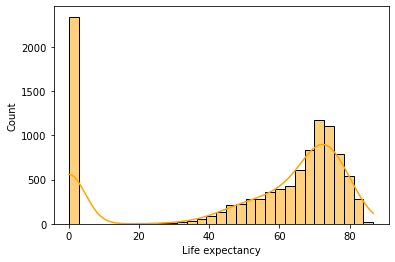

In [20]:
sns.histplot(Life_Exp['Life expectancy'].dropna(), kde=True, color='orange')

### Filter data with life expectancy less than 20

In [21]:
Life_Exp=Life_Exp[Life_Exp['Life expectancy']>20]

In [22]:
Life_Exp.shape

(7895, 35)

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

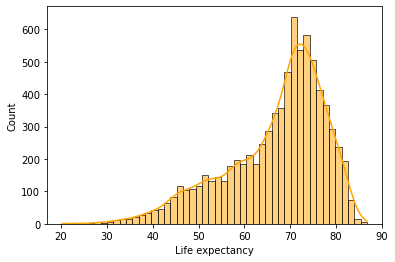

In [23]:
sns.histplot(Life_Exp['Life expectancy'].dropna(), kde=True, color='orange')

#### Checking unique data


In [24]:
Life_Exp.nunique()

Country                             221
Year                                 69
Country_Code                        214
GDP per capita                     5499
Population                         7887
World Happiness Index               152
$3.20_PER_DAY_BPL                  4774
$1.90_PER_DAY_BPL                  4544
Health expenditure per capita      3776
infant_death                       4316
Death_by_executions                  71
Death_by_Meningitis                2151
Death_by_Malaria                   1839
Death_by_Drowning                  1996
Death_by_violence                  2269
Death by HIV/AIDS                  2551
Death_by_Alcohol_&_Drugs           1664
Death by Tuberculosis              2985
Death_by_Suicide                   2887
Terrorism (deaths)                  426
Death by Cardiovascular disease    5373
Death by Kidney disease            3379
Death by Respiratory disease       3952
Death by Cirrhosis                 3573
Death_by_Alzheimer's               3160


### Show all the Duplicate rows from the dataframe

In [25]:
duplicate=Life_Exp[Life_Exp.duplicated()]
duplicate

Empty DataFrame
Columns: [Country, Year, Country_Code, GDP per capita, Population, World Happiness Index, $3.20_PER_DAY_BPL, $1.90_PER_DAY_BPL, Health expenditure per capita, infant_death, Death_by_executions, Death_by_Meningitis, Death_by_Malaria, Death_by_Drowning, Death_by_violence, Death by HIV/AIDS, Death_by_Alcohol_&_Drugs, Death by Tuberculosis, Death_by_Suicide, Terrorism (deaths), Death by Cardiovascular disease, Death by Kidney disease, Death by Respiratory disease, Death by Cirrhosis, Death_by_Alzheimer's, Death_by_Parkinson's, Daily Calorie Intake, Death_by_pollution, Death_by_malnutrition, Death_by_Alcohol_Abuse, Death_by_Other_RF, Death_by_other_disease, Life expectancy, continent, Country_2_Code]
Index: []

[0 rows x 35 columns]

### Display the Number of Duplicate Rows

In [26]:
len(duplicate)

0

### Drop all the Duplicate Rows

In [27]:
Life_Exp.drop_duplicates(inplace=True)
Life_Exp

Country    Year Country_Code  GDP per capita  Population  \
0      Afghanistan  1990.0          AFG        963.0000  12412311.0   
1      Afghanistan  1991.0          AFG        881.1704  13299016.0   
2      Afghanistan  1992.0          AFG        843.8753  14485543.0   
3      Afghanistan  1993.0          AFG        578.4027  15816601.0   
4      Afghanistan  1994.0          AFG        428.4246  17075728.0   
...            ...     ...          ...             ...         ...   
16379       Canada  1951.0            0      12007.0000  14078449.0   
16380       Canada  1952.0            0      12486.0000  14445453.0   
16381       Canada  1953.0            0      12726.0000  14834905.0   
16382       Canada  1954.0            0      12272.0000  15245416.0   
16383       Canada  1955.0            0      13072.0000  15673764.0   

       World Happiness Index  $3.20_PER_DAY_BPL  $1.90_PER_DAY_BPL  \
0                      3.983                0.0                0.0   
1                      3.983                0.0                0.0   
2                      3.983                0.0                0.0   
3                      3.983                0.0                0.0   
4                      3.983                0.0                0.0   
...                      ...                ...                ...   
16379                  7.413                0.0                0.0   
16380                  7.413                0.0                0.0   
16381                  7.413                0.0                0.0   
16382                  7.413                0.0                0.0   
16383                  7.413                0.0                0.0   

       Health expenditure per capita  infant_death  ... Death_by_Parkinson's  \
0                                0.0       71955.0  ...                371.0   
1                                0.0       75883.0  ...                374.0   
2                                0.0       85444.0  ...                378.0   
3                                0.0       97256.0  ...                384.0   
4                                0.0      104630.0  ...                391.0   
...                              ...           ...  ...                  ...   
16379                            0.0           0.0  ...                  0.0   
16380                            0.0           0.0  ...                  0.0   
16381                            0.0           0.0  ...                  0.0   
16382                            0.0           0.0  ...                  0.0   
16383                            0.0           0.0  ...                  0.0   

       Daily Calorie Intake  Death_by_pollution  Death_by_malnutrition  \
0                    2314.0             78474.0                59699.0   
1                    2044.0             81238.0                62535.0   
2                    1891.0             87988.0                67541.0   
3                    1910.0             96417.0                72461.0   
4                    1820.0            100767.0                75317.0   
...                     ...                 ...                    ...   
16379                   0.0                 0.0                    0.0   
16380                   0.0                 0.0                    0.0   
16381                   0.0                 0.0                    0.0   
16382                   0.0                 0.0                    0.0   
16383                   0.0                 0.0                    0.0   

       Death_by_Alcohol_Abuse  Death_by_Other_RF  Death_by_other_disease  \
0                     37556.0            33607.0                 72573.0   
1                     38752.0            34614.0                 77836.0   
2                     42481.0            36618.0                 86051.0   
3                     48522.0            39755.0                 95637.0   
4                     52374.0            40907.0                100081.0   
...        

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [28]:
Life_Exp.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [29]:
Life_Exp.shape

(7895, 35)

### Find out the total count of null values in each columns

In [30]:
Life_Exp.isnull().sum()

Country                             0
Year                                0
Country_Code                        0
GDP per capita                      0
Population                          0
World Happiness Index               0
$3.20_PER_DAY_BPL                   0
$1.90_PER_DAY_BPL                   0
Health expenditure per capita       0
infant_death                        0
Death_by_executions                 0
Death_by_Meningitis                 0
Death_by_Malaria                    0
Death_by_Drowning                   0
Death_by_violence                   0
Death by HIV/AIDS                   0
Death_by_Alcohol_&_Drugs            0
Death by Tuberculosis               0
Death_by_Suicide                    0
Terrorism (deaths)                  0
Death by Cardiovascular disease     0
Death by Kidney disease             0
Death by Respiratory disease        0
Death by Cirrhosis                  0
Death_by_Alzheimer's                0
Death_by_Parkinson's                0
Daily Calori

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [31]:
Life_Exp.dtypes

Country                             object
Year                               float64
Country_Code                        object
GDP per capita                     float64
Population                         float64
World Happiness Index              float64
$3.20_PER_DAY_BPL                  float64
$1.90_PER_DAY_BPL                  float64
Health expenditure per capita      float64
infant_death                       float64
Death_by_executions                 object
Death_by_Meningitis                float64
Death_by_Malaria                   float64
Death_by_Drowning                  float64
Death_by_violence                  float64
Death by HIV/AIDS                  float64
Death_by_Alcohol_&_Drugs           float64
Death by Tuberculosis              float64
Death_by_Suicide                   float64
Terrorism (deaths)                 float64
Death by Cardiovascular disease    float64
Death by Kidney disease            float64
Death by Respiratory disease       float64
Death by Ci

#### display the "Life expectancy" column value

In [32]:
Life_Exp[['Life expectancy']]

Life expectancy
0               50.331
1               50.999
2               51.641
3               52.256
4               52.842
...                ...
16379           68.638
16380           68.922
16381           69.197
16382           69.463
16383           69.721

[7895 rows x 1 columns]

In [33]:
Life_Exp=Life_Exp.fillna(0)

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

In [34]:
Life_Exp.groupby(Life_Exp['Country']).count()

Year  Country_Code  GDP per capita  Population  \
Country                                                          
Afghanistan       69            69              69          69   
Africa            69            69              69          69   
Albania           69            69              69          69   
Algeria           69            69              69          69   
American Samoa    69            69              69          69   
...              ...           ...             ...         ...   
Western Sahara     2             2               2           2   
World             30            30              30          30   
Yemen             30            30              30          30   
Zambia            30            30              30          30   
Zimbabwe          30            30              30          30   

                World Happiness Index  $3.20_PER_DAY_BPL  $1.90_PER_DAY_BPL  \
Country                                                                       
Afghanistan                        69                 69                 69   
Africa                             69                 69                 69   
Albania                            69                 69                 69   
Algeria                            69                 69                 69   
American Samoa                     69                 69                 69   
...                               ...                ...                ...   
Western Sahara                      2                  2                  2   
World                              30                 30                 30   
Yemen                              30                 30                 30   
Zambia                             30                 30                 30   
Zimbabwe                           30                 30                 30   

                Health expenditure per capita  infant_death  \
Country                                                       
Afghanistan                                69            69   
Africa                                     69            69   
Albania                                    69            69   
Algeria                                    69            69   
American Samoa                             69            69   
...                                       ...           ...   
Western Sahara                              2             2   
World                                      30            30   
Yemen                                      30            30   
Zambia                                     30            30   
Zimbabwe                                   30            30   

                Death_by_executions  ...  Death_by_Parkinson's  \
Country                              ...                         
Afghanistan                      69  ...                    69   
Africa                           69  ...                    69   
Albania                          69  ...                    69   
Algeria                          69  ...                    69   
American Samoa                   69  ...                    69   
...                             ...  ...                   ...   
Western Sahara                    2  ...                     2   
World                            30  ...                    30   
Yemen                            30  ...                    30   
Zambia                           30  ...                    30   
Zimbabwe                         30  ...                    30   

                Daily Calorie Intake  Death_by_pollution  \
Country                                                    
Afghanistan                       69                  69   
Africa                            69                  69   
Albania                           69                  69   
Algeria                           69                  69   
American Samoa                    69                  69   
...                           

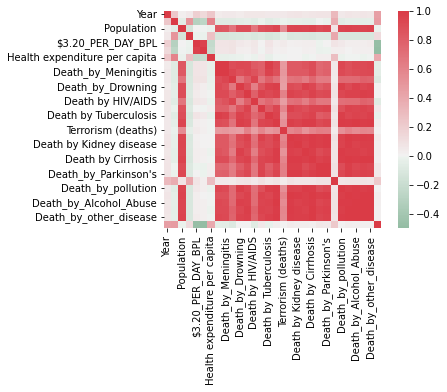

In [35]:
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(Life_Exp.corr(), cmap=cmap, center=0, annot=False, square=True);

In [36]:
fig = px.scatter(Life_Exp, x="GDP per capita", y="Life expectancy",
	         size="Population", color="continent", hover_name="Country", log_x=True, 
                 size_max=80,title="Life Expectancy Vs GDP as per the population")
fig.show()

In [37]:
num_attributes = Life_Exp.select_dtypes( include=['int64', 'float64'] )
cat_attributes = Life_Exp.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [38]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes       min           max         range  \
0                              Year  1951.000  2.019000e+03  6.800000e+01   
1                    GDP per capita     0.000  1.562990e+05  1.562990e+05   
2                        Population  1126.000  7.713468e+09  7.713467e+09   
3             World Happiness Index     0.000  7.603000e+00  7.603000e+00   
4                 $3.20_PER_DAY_BPL     0.000  9.885746e+01  9.885746e+01   
5                 $1.90_PER_DAY_BPL     0.000  9.529149e+01  9.529149e+01   
6     Health expenditure per capita     0.000  9.402537e+03  9.402537e+03   
7                      infant_death     0.000  1.098801e+07  1.098801e+07   
8               Death_by_Meningitis     0.000  4.325240e+05  4.325240e+05   
9                  Death_by_Malaria     0.000  9.611290e+05  9.611290e+05   
10                Death_by_Drowning     0.000  4.606650e+05  4.606650e+05   
11                Death_by_violence     0.000  4.631290e+05  4.631290e+05   
12                Death by HIV/AIDS     0.000  1.844490e+06  1.844490e+06   
13         Death_by_Alcohol_&_Drugs     0.000  2.960980e+05  2.960980e+05   
14            Death by Tuberculosis     0.000  1.808478e+06  1.808478e+06   
15                 Death_by_Suicide     0.000  8.411640e+05  8.411640e+05   
16               Terrorism (deaths)     0.000  4.449000e+04  4.449000e+04   
17  Death by Cardiovascular disease     0.000  1.856251e+07  1.856251e+07   
18          Death by Kidney disease     0.000  1.427232e+06  1.427232e+06   
19     Death by Respiratory disease     0.000  3.974315e+06  3.974315e+06   
20               Death by Cirrhosis     0.000  1.472012e+06  1.472012e+06   
21             Death_by_Alzheimer's     0.000  1.623276e+06  1.623276e+06   
22             Death_by_Parkinson's     0.000  3.629070e+05  3.629070e+05   
23             Daily Calorie Intake     0.000  3.885000e+03  3.885000e+03   
24               Death_by_pollution     0.000  1.559767e+07  1.559767e+07   
25            Death_by_malnutrition     0.000  1.975621e+07  1.975621e+07   
26           Death_by_Alcohol_Abuse     0.000  1.327602e+07  1.327602e+07   
27                Death_by_Other_RF     0.000  1.321446e+07  1.321446e+07   
28           Death_by_other_disease     0.000  2.173734e+07  2.173734e+07   
29                  Life expectancy    20.317  8.675100e+01  6.643400e+01   

            mean        median           std       skew    kurtosis  
0   1.997976e+03  2.001000e+03  1.634124e+01  -1.088775    0.643763  
1   8.988802e+03  3.104000e+03  1.387821e+04   3.100116   17.272831  
2   8.517487e+07  5.441323e+06  5.099906e+08  10.120008  115.584478  
3   3.709897e+00  4.607000e+00  2.617052e+00  -0.451985   -1.325560  
4   2.097420e+01  1.330655e+00  2.987624e+01   1.215711    0.008206  
5   1.221136e+01  4.798256e-01  2.149128e+01   1.907691    2.631368  
6   4.278572e+02  0.000000e+00  9.376360e+02   3.510032   15.483157  
7   8.929907e+04  7.780000e+02  6.149123e+05  11.349991  148.299615  
8   3.955759e+03  4.400000e+01  2.688182e+04  10.886797  133.893662  
9   9.622039e+03  0.000000e+00  7.084118e+04  10.701635  119.803556  
10  3.822304e+03  8.800000e+01  2.806172e+04  11.193422  137.472166  
11  4.248535e+03  1.350000e+02  2.857431e+04  12.787635  181.392963  
12  1.358756e+04  5.100000e+01  1.030227e+05  12.476671  169.949600  
13  2.613036e+03  5.700000e+01  1.791247e+04  11.382865  148.184992  
14  1.732145e+04  1.090000e+02  1.214306e+05  10.445619  120.044265  
15  8.707003e+03  2.920000e+02  5.995556e+04  10.667285  124.530182  
16  8.517087e+01  0.000000e+00  1.034280e+03  27.444119  946.688235  
17  1.634066e+05  6.501000e+03  1.102323e+06  11.297742  142.970229  
18  1.024291e+04  4.480000e+02  7.157358e+04  12.711626  185.198623  
19  3.853268e+04  7.940000e+02  2.834166e+05  10.177690  109.892249  
20  1.363044e+04  4.700000e+02  9.099935e+04  11.540984  147.399418  
21  1.052897e+04  3.270000e+02  7.421005e+04  13.193858  207.027023  
22  2.566417e+03  8.600000e

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'GDP per capita'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'World Happiness Index'}>,
        <AxesSubplot:title={'center':'$3.20_PER_DAY_BPL'}>],
       [<AxesSubplot:title={'center':'$1.90_PER_DAY_BPL'}>,
        <AxesSubplot:title={'center':'Health expenditure per capita'}>,
        <AxesSubplot:title={'center':'infant_death'}>,
        <AxesSubplot:title={'center':'Death_by_Meningitis'}>,
        <AxesSubplot:title={'center':'Death_by_Malaria'}>],
       [<AxesSubplot:title={'center':'Death_by_Drowning'}>,
        <AxesSubplot:title={'center':'Death_by_violence'}>,
        <AxesSubplot:title={'center':'Death by HIV/AIDS'}>,
        <AxesSubplot:title={'center':'Death_by_Alcohol_&_Drugs'}>,
        <AxesSubplot:title={'center':'Death by Tuberculosis'}>],
       [<AxesSubplot:title={'center':'Death_by_Suicide'}>,
        <AxesSubplot:title={'center':'

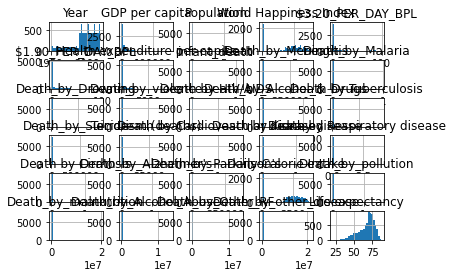

In [39]:
# plt.figure(figsize=(15,10))
num_attributes.hist( bins=30)

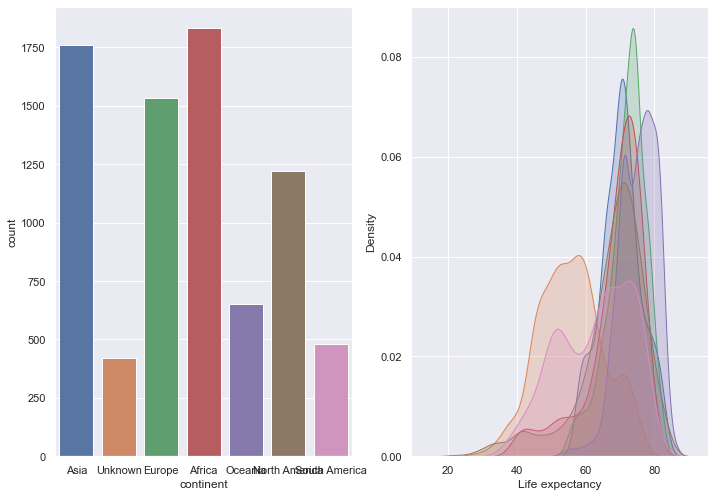

In [40]:
## Status

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.subplot( 1, 2, 1 )
sns.countplot( Life_Exp['continent'] )

plt.subplot( 1, 2, 2 )
sns.kdeplot( Life_Exp[Life_Exp['continent'] =='Oceania']['Life expectancy'], label='continent', shade=True )
sns.kdeplot( Life_Exp[Life_Exp['continent'] =='Africa']['Life expectancy'], label='continent', shade=True )
sns.kdeplot( Life_Exp[Life_Exp['continent'] =='North America']['Life expectancy'], label='continent', shade=True )
sns.kdeplot( Life_Exp[Life_Exp['continent'] =='South America']['Life expectancy'], label='continent', shade=True )
sns.kdeplot( Life_Exp[Life_Exp['continent'] =='Europe']['Life expectancy'], label='continent', shade=True )
sns.kdeplot( Life_Exp[Life_Exp['continent'] =='Asia']['Life expectancy'], label='continent', shade=True )
sns.kdeplot( Life_Exp[Life_Exp['continent'] =='Unknown']['Life expectancy'], label='continent', shade=True );

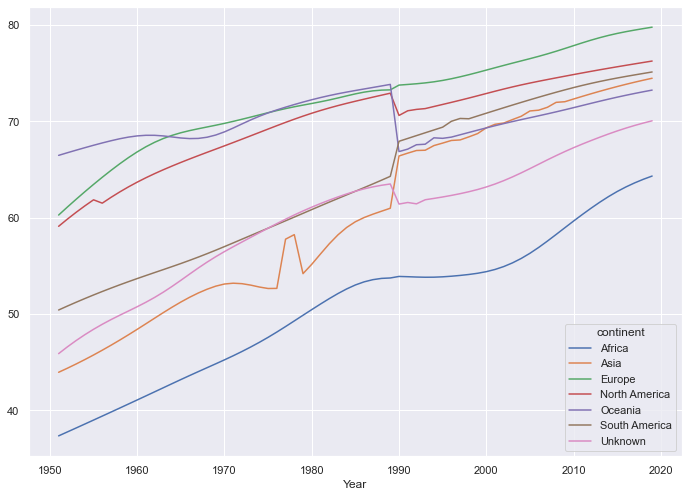

In [41]:
#life_expectancy mean per year
aux1 = Life_Exp[['Year','continent','Life expectancy']].groupby(['continent','Year']).mean().reset_index()
aux1.pivot(index='Year',columns='continent',values='Life expectancy').plot();

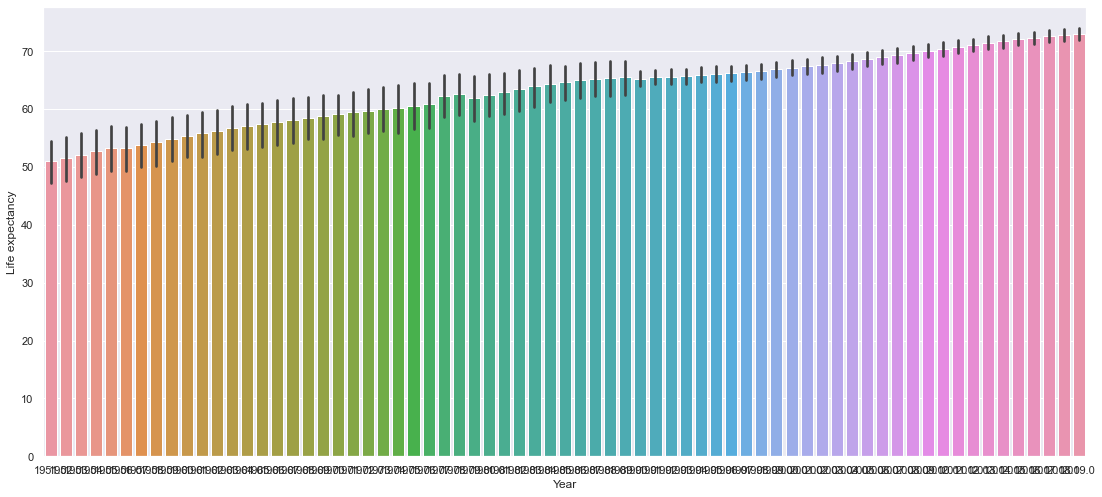

In [42]:
#life_expectancy mean per year
sns.set(rc={'figure.figsize':(18.7,8.27)})
aux1 = Life_Exp[['Year','Country','Life expectancy']].groupby(['Country','Year']).mean().reset_index()
sns.barplot(x='Year',y='Life expectancy',data=aux1);

### World Happiness Index

<AxesSubplot:xlabel='World Happiness Index', ylabel='Density'>

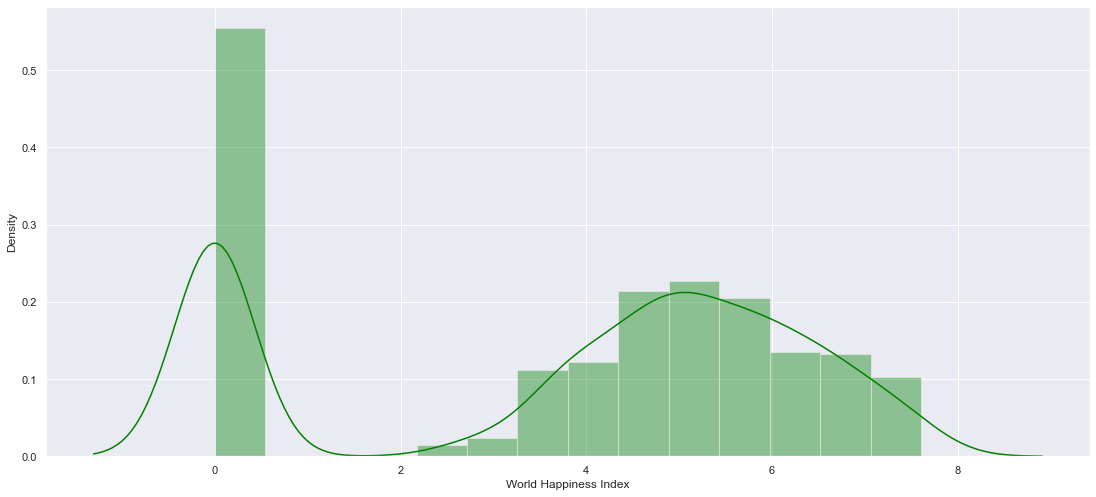

In [43]:
sns.distplot(Life_Exp['World Happiness Index'],color='green')

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [44]:
target = Life_Exp['Life expectancy']
features = Life_Exp[Life_Exp.columns.difference(['Life expectancy', 'Year'])]
features.head()

$1.90_PER_DAY_BPL  $3.20_PER_DAY_BPL      Country Country_2_Code  \
0                0.0                0.0  Afghanistan             AF   
1                0.0                0.0  Afghanistan             AF   
2                0.0                0.0  Afghanistan             AF   
3                0.0                0.0  Afghanistan             AF   
4                0.0                0.0  Afghanistan             AF   

  Country_Code  Daily Calorie Intake  Death by Cardiovascular disease  \
0          AFG                2314.0                          44899.0   
1          AFG                2044.0                          45492.0   
2          AFG                1891.0                          46557.0   
3          AFG                1910.0                          47951.0   
4          AFG                1820.0                          49308.0   

   Death by Cirrhosis  Death by HIV/AIDS  Death by Kidney disease  ...  \
0              2673.0               34.0                   3709.0  ...   
1              2728.0               41.0                   3724.0  ...   
2              2830.0               48.0                   3776.0  ...   
3              2943.0               56.0                   3862.0  ...   
4              3027.0               63.0                   3932.0  ...   

   Death_by_other_disease  Death_by_pollution  Death_by_violence  \
0                 72573.0             78474.0             1538.0   
1                 77836.0             81238.0             2001.0   
2                 86051.0             87988.0             2299.0   
3                 95637.0             96417.0             2589.0   
4                100081.0            100767.0             2849.0   

   GDP per capita  Health expenditure per capita  Population  \
0        963.0000                            0.0  12412311.0   
1        881.1704                            0.0  13299016.0   
2        843.8753                            0.0  14485543.0   
3        578.4027                            0.0  15816601.0   
4        428.4246                            0.0  17075728.0   

   Terrorism (deaths)  World Happiness Index  continent  infant_death  
0                12.0                  3.983       Asia       71955.0  
1                68.0                  3.983       Asia       75883.0  
2                49.0                  3.983       Asia       85444.0  
3                 0.0                  3.983       Asia       97256.0  
4                22.0                  3.983       Asia      104630.0  

[5 rows x 33 columns]

In [45]:
target.head()

0    50.331
1    50.999
2    51.641
3    52.256
4    52.842
Name: Life expectancy, dtype: float64

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [46]:
X_train,X_loc_test,y_train,y_loc_test=train_test_split(pd.get_dummies(features), target, test_size=0.25)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [47]:
X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape

((5921, 753), (1974, 753), (5921,), (1974,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [48]:
X_val,X_test,y_val,y_test=train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=10)

### Please check for the number of rows and columns of all the 4 dataframes 

In [49]:
X_val.shape ,X_test.shape ,y_val.shape, y_test.shape

((987, 753), (987, 753), (987,), (987,))

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


# Feature Engineering 

### Display and describe the X_train dataframe 

In [50]:
X_train

$1.90_PER_DAY_BPL  $3.20_PER_DAY_BPL  Daily Calorie Intake  \
3119           21.259530           55.11433                   0.0   
4895            0.000000            0.00000                   0.0   
5954            0.000000            0.00000                2466.0   
10027           0.000000            0.00000                2191.0   
2996            0.000000            0.00000                   0.0   
...                  ...                ...                   ...   
14501          52.128630           72.26192                1987.0   
6011            0.000000            0.00000                2474.0   
14713           0.000000            0.00000                2243.0   
12768           0.000000            0.00000                   0.0   
2295            5.108852           35.18682                3367.0   

       Death by Cardiovascular disease  Death by Cirrhosis  Death by HIV/AIDS  \
3119                           14547.0              2382.0             4037.0   
4895                              25.0                 2.0                0.0   
5954                             140.0                 8.0               15.0   
10027                              0.0                 0.0                0.0   
2996                             116.0                 9.0                2.0   
...                                ...                 ...                ...   
14501                              0.0                 0.0                0.0   
6011                             240.0                12.0               33.0   
14713                              0.0                 0.0                0.0   
12768                              0.0                 0.0                0.0   
2295                          197027.0             46652.0              116.0   

       Death by Kidney disease  Death by Respiratory disease  \
3119                    1933.0                        2787.0   
4895                       2.0                           5.0   
5954                      18.0                           8.0   
10027                      0.0                           0.0   
2996                       7.0                          30.0   
...                        ...                           ...   
14501                      0.0                           0.0   
6011                      23.0                          13.0   
14713                      0.0                           0.0   
12768                      0.0                           0.0   
2295                   14537.0                       17851.0   

       Death by Tuberculosis  Death_by_Alcohol_&_Drugs  ...  \
3119                  4396.0                      97.0  ...   
4895                     1.0                       0.0  ...   
5954                     1.0                       6.0  ...   
10027                    0.0                       0.0  ...   
2996                     3.0                      11.0  ...   
...                      ...                       ...  ...   
14501                    0.0                       0.0  ...   
6011                     3.0                       5.0  ...   
14713                    0.0                       0.0  ...   
12768                    0.0                       0.0  ...   
2295                  1053.0                     152.0  ...   

       Death_by_executions_977  Death_by_executions_>1  \
3119                         0                       0   
4895                         0                       0   
5954                         0                       0   
10027                        0                       0   
2996                         0                       0   
...                        ...                     ...   
14501                        0                       0   
6011                         0                       0   
14713                        0                       0   
12768                        0                       0   
2295                         0           

In [51]:
X_train.describe()

$1.90_PER_DAY_BPL  $3.20_PER_DAY_BPL  Daily Calorie Intake  \
count        5921.000000        5921.000000           5921.000000   
mean           12.168948          21.000215           1902.271298   
std            21.381394          29.836958           1288.356715   
min             0.000000           0.000000              0.000000   
25%             0.000000           0.000000              0.000000   
50%             0.490815           1.351948           2351.000000   
75%            14.509970          36.904970           2884.000000   
max            95.291490          98.857460           3835.000000   

       Death by Cardiovascular disease  Death by Cirrhosis  Death by HIV/AIDS  \
count                     5.921000e+03        5.921000e+03       5.921000e+03   
mean                      1.621432e+05        1.360617e+04       1.347020e+04   
std                       1.079045e+06        8.912301e+04       1.001703e+05   
min                       0.000000e+00        0.000000e+00       0.000000e+00   
25%                       1.380000e+02        9.000000e+00       1.000000e+00   
50%                       6.639000e+03        4.730000e+02       5.000000e+01   
75%                       3.143200e+04        2.846000e+03       1.022000e+03   
max                       1.812402e+07        1.448499e+06       1.809961e+06   

       Death by Kidney disease  Death by Respiratory disease  \
count             5.921000e+03                  5.921000e+03   
mean              1.028293e+04                  3.881416e+04   
std               6.956172e+04                  2.811639e+05   
min               0.000000e+00                  0.000000e+00   
25%               1.300000e+01                  1.600000e+01   
50%               4.490000e+02                  8.100000e+02   
75%               2.148000e+03                  3.865000e+03   
max               1.388601e+06                  3.888249e+06   

       Death by Tuberculosis  Death_by_Alcohol_&_Drugs  ...  \
count           5.921000e+03               5921.000000  ...   
mean            1.759668e+04               2539.626246  ...   
std             1.211123e+05              17246.316174  ...   
min             0.000000e+00                  0.000000  ...   
25%             1.000000e+00                  1.000000  ...   
50%             1.090000e+02                 58.000000  ...   
75%             1.837000e+03                365.000000  ...   
max             1.787128e+06             288673.000000  ...   

       Death_by_executions_977  Death_by_executions_>1  \
count              5921.000000             5921.000000   
mean                  0.000169                0.000844   
std                   0.012996                0.029050   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max                   1.000000                1.000000   

       Death_by_executions_>1000  continent_Africa  continent_Asia  \
count                5921.000000       5921.000000     5921.000000   
mean                    0.001182          0.232055        0.224455   
std                     0.034366          0.422180        0.417258   
min                     0.000000          0.000000        0.000000   
25%                     0.000000          0.000000        0.000000   
50%                     0.000000          0.000000        0.000000   
75%                     0.000000          0.000000        0.000000   
max                     1.000000          1.000000        1.000000   

       continent_Europe  continent_North America  continent_Oceania  \
count       5921.000000              5921.000000        5921.000000   
mean           0.196420                 0.149975           0.083263   
std            0.397323                 0.357077           0.276303   
min            0.000000                 0.000000           0.000000   
2

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [52]:
X_train.dtypes

$1.90_PER_DAY_BPL                  float64
$3.20_PER_DAY_BPL                  float64
Daily Calorie Intake               float64
Death by Cardiovascular disease    float64
Death by Cirrhosis                 float64
                                    ...   
continent_Europe                     uint8
continent_North America              uint8
continent_Oceania                    uint8
continent_South America              uint8
continent_Unknown                    uint8
Length: 753, dtype: object

In [53]:
X_test.dtypes

$1.90_PER_DAY_BPL                  float64
$3.20_PER_DAY_BPL                  float64
Daily Calorie Intake               float64
Death by Cardiovascular disease    float64
Death by Cirrhosis                 float64
                                    ...   
continent_Europe                     uint8
continent_North America              uint8
continent_Oceania                    uint8
continent_South America              uint8
continent_Unknown                    uint8
Length: 753, dtype: object

In [54]:
X_val.dtypes

$1.90_PER_DAY_BPL                  float64
$3.20_PER_DAY_BPL                  float64
Daily Calorie Intake               float64
Death by Cardiovascular disease    float64
Death by Cirrhosis                 float64
                                    ...   
continent_Europe                     uint8
continent_North America              uint8
continent_Oceania                    uint8
continent_South America              uint8
continent_Unknown                    uint8
Length: 753, dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [55]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

734

- Note - Keep the code as it is, no need to change 


In [56]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

19


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [57]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

407


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [58]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [59]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['Country_2_Code_YE',
 'Death_by_Alcohol_Abuse',
 'Country_2_Code_OM',
 'Country_Code_ISL',
 'Country_Code_SDN',
 'Country_Code_SVK',
 'Country_Code_KOR',
 'Country_Code_ZMB',
 'Country_Code_SGP',
 'Country_2_Code_KM',
 'Country_Code_IDN',
 'Country_2_Code_DK',
 'Country_Code_LSO',
 'Country_Code_PSE',
 'Country_2_Code_SR',
 'Country_2_Code_SO',
 'Country_Code_PLW',
 'Country_2_Code_CF',
 'Country_2_Code_NL',
 'Country_Code_LBR',
 'Country_2_Code_SS',
 'Country_2_Code_TD',
 'Country_Code_NLD',
 'Death_by_Alcohol_&_Drugs',
 'Country_Code_THA',
 'Country_Code_TKL',
 'Country_2_Code_IN',
 'Country_Code_CPV',
 'Country_Code_PRY',
 'Country_Code_LCA',
 'Country_2_Code_NO',
 'Country_Code_FSM',
 'Country_Code_GMB',
 'Country_2_Code_LR',
 'Country_Code_LUX',
 'Country_Code_SYR',
 'Country_2_Code_AO',
 'continent_Unknown',
 'Country_2_Code_IE',
 'Country_Code_IND',
 'Country_Code_CRI',
 'Country_2_Code_BA',
 'Country_Code_NGA',
 'Country_2_Code_SL',
 'Country_Code_GUM',
 'Country_2_Code_AS',
 

In [60]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [61]:
sel.variances_

array([4.57086819e+02, 8.90093733e+02, 1.65958269e+06, 1.16414099e+12,
       7.94156905e+09, 1.00323964e+10, 4.83801608e+09, 7.90397792e+10,
       1.46657010e+10, 2.97385188e+08, 8.43403964e+11, 5.11425767e+09,
       7.70767338e+08, 4.97666241e+09, 7.17127101e+08, 7.16113383e+11,
       3.01017595e+08, 3.50960990e+09, 1.30892114e+12, 2.10228091e+12,
       1.37853837e+12, 7.69752695e+08, 1.89487927e+08, 8.77377454e+05,
       2.55547073e+17, 9.55080791e+05, 6.85340831e+00, 3.75756650e+11,
       8.87106686e-03, 8.87106686e-03, 9.86524110e-03, 7.54230653e-03,
       8.37320960e-03, 9.36841070e-03, 8.53921907e-03, 8.20714308e-03,
       8.37320960e-03, 8.70517149e-03, 9.03690519e-03, 8.20714308e-03,
       9.53407788e-03, 8.37320960e-03, 8.87106686e-03, 8.87106686e-03,
       8.87106686e-03, 7.54230653e-03, 9.69968801e-03, 7.54230653e-03,
       7.70860124e-03, 8.87106686e-03, 8.20714308e-03, 8.53921907e-03,
       8.20714308e-03, 8.04101951e-03, 8.04101951e-03, 8.70517149e-03,
      

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [62]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [63]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [64]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [65]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

99.49803273561605

### Display The Comparison Lists

In [66]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[12.480740037599816],[0.8904476799184635],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [67]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [68]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [69]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

11.229571859130791

### Display The Comparison Lists

In [70]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[12.480740037599816, 120.78046862717095],[0.8904476799184635, -0.06017596062247743],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [71]:
from sklearn.tree import DecisionTreeRegressor 
Algorithm.append('Decision Tree Regression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [72]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [73]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

1.983802855886467

### Display The Comparison Lists

In [74]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression'],[12.480740037599816, 120.78046862717095, 1.7252765805471126],[0.8904476799184635, -0.06017596062247743, 0.9848560220297943],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [75]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [76]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [77]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

1.2150284444333355

### Display The Comparison Lists


In [78]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regressor'],[12.480740037599816, 120.78046862717095, 1.7252765805471126, 1.0644587102757392],[0.8904476799184635, -0.06017596062247743, 0.9848560220297943, 0.9906564898403145],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [79]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [80]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test,predicted))

### Check the same for the Validation set also 

In [81]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

1.7226989697552937

### Display The Comparison Lists


In [82]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regressor', 'XGB Regressor'],[12.480740037599816, 120.78046862717095, 1.7252765805471126, 1.0644587102757392, 2.167559951575018],[0.8904476799184635, -0.06017596062247743, 0.9848560220297943, 0.9906564898403145, 0.9809737867389687],

## You need to make the comparison list into a comparison dataframe 

In [83]:
comparison=pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns=['Algorithm', 'MSE_Score', 'R2_Score'])
comparison

Algorithm   MSE_Score  R2_Score
0           LinearRegression   12.480740  0.890448
1  Support Vector Regression  120.780469 -0.060176
2   Decision Tree Regression    1.725277  0.984856
3    Random Forest Regressor    1.064459  0.990656
4              XGB Regressor    2.167560  0.980974

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [84]:
regressorfinal = RandomForestRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [85]:
mean_squared_error(y_test,predictedfinal,squared=False)

1.0353958392482183


### Calculate the mean Square Error for validation dataset

In [86]:
mean_squared_error(y_val,predict_testfinal,squared=False)

1.2562388858886464

### Calculate the R2 score for test

In [87]:
r2_score(y_test,predictedfinal)

0.9905899035902724

### Calculate the R2 score for Validation

In [88]:
r2_score(y_val,predict_testfinal)

0.9862714299688554

### Calculate the Accuracy for train Dataset 

In [89]:
regressorfinal.score(X_train,y_train)

0.9982928009344626

### Calculate the accuracy for validation

In [90]:
regressorfinal.score(X_val,y_val)

0.9862714299688554

### Calculate the accuracy for test

In [91]:
regressorfinal.score(X_test,y_test)

0.9905899035902724

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

### Store this dataframe into the .csv format

# END OF THE PROJECT